### 머신러닝(Machine Learning) 종류

- 지도학습 (Supervised Learning)
- 비지도학습 (Unsupervised Learning)
- 강화학습 (Reinforcement Learning)


지도학습 (Supervised Learning)

- 데이터에 대한 Label(명시적인 답)이 주어진 상태에서 컴퓨터를 학습시키는 방법. 

- 분류(Classification)와 회귀(Regression)로 나뉘어진다.
> (ex. 스팸 메일 분류, 집 가격 예측, 손글씨 숫자 판별, 신용카드 의심거래 감지, 의료영상 이미지기반 종양판단)


비지도학습 (Unsupervised Learning)

- 데이터에 대한 Label(명시적인 답)이 없는 상태에서 컴퓨터를 학습시키는 방법.

- 데이터의 숨겨진 특징, 구조, 패턴 파악.

- 데이터를 비슷한 특성끼리 묶는 클러스터링(Clustering)과 차원축소(Dimensionality Reduction)등이 있다.
> (ex. 블로그 글 주제구분, 고객 취향별 그룹화, 웹사이트 비정상 접근 탐지, 이미지 감색 처리, 소비자 그룹 마케팅)

좋은 입력 데이터를 만들어내는 방법 -> 특성추출(특성공학)

강화학습 (Reinforcement Learning)

- 지도학습과 비슷하지만 완전한 답(Label)을 제공하지 않는 특징이 있다.

- 기계는 더 많은 보상을 얻을 수 있는 방향으로 행동을 학습

> (ex. 게임이나 로봇 학습)


머신러닝 vs 딥러닝

|구분| Machine Learning| Deep Learning|
|---|---|---|
|훈련 데이터 크기| 작음| 큼|
|시스템 성능| 저 사양| 고 사양|
|feature 선택| 전문가 (사람) |알고리즘|
|feature 수| 많음 |적음|
|문제 해결 접근법| 문제를 분리 -> 각각 답을 얻음 -> 결과 통합| end-to-end (결과를 바로 얻음)|
|실행 시간| 짧음 |김|
|해석력 |해석 가능| 해석 어려움|

### [scikit-learn](https://scikit-learn.org/stable/index.html)

- 파이썬에 머신러닝 프레임워크 라이브러리

- 회귀, 분류, 군집, 차원축소, 특성공학, 전처리, 교차검증, 파이프라인 등 머신러닝에 필요한 기능 제공

- 학습을 위한 샘플 데이터 제공


#### scikit-learn으로 XOR 연산 학습해보기

XOR연산?

- 두값이 서로 같으면 0, 다르면 1  (배타적 논리 합)

|P(입력)| Q(입력)| R(출력)|
|---|---|---|
| 0| 0| 0|
| 0| 1| 1|
| 1| 0| 1|
| 1| 1| 0|


In [7]:
from sklearn import svm

# XOR의 계산 결과 데이터
xor_input = [
   # P, Q, Result
    [0, 0, 0],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 0]
]

# 학습을 위해 데이터와 레이블 분리하기 --- (※1)
xor_data = []   # 문제
xor_label = []  # 답
for row in xor_input:
    p = row[0]#row의 인덱스
    q = row[1]
    r = row[2]
    xor_data.append([p, q]) # [[0,0]] -> [[0,0],[0,1]] 이런식으로 변화
    # for문이 돌아가면서 하나하나 증가된다.
    xor_label.append(r)

# 데이터 학습시키기 --- (※2)
model = svm.SVC()                 # svm 알고리즘 사용
model.fit(xor_data, xor_label)    # fit(학습시킬 데이터, 정답)

# 데이터 예측하기 --- (※3)
pre = model.predict(xor_data)
print(" 예측데이터 : ",xor_data)
print(" 예측  결과 : ", pre)

# 결과 확인하기 --- (※4)
ok = 0
total = 0
for idx, answer in enumerate(xor_label):#enumerate는 배열하다 라는 뜻
    p = pre[idx]
    if p == answer: 
        ok += 1 #ok = ok + 1 과 동일
        total += 1

print("정답률:", ok, "/", total, "=", ok/total)

예측데이터 :  [[0, 0], [0, 1], [1, 0], [1, 1]]
 예측  결과 :  [0 1 1 0]
정답률: 4 / 4 = 1.0


In [ ]:
# pandas 라이브러리를 사용하여 코드 간략화
# 매우 간단하게 다룰 수 있어진다.
import pandas as pd
from sklearn import svm, metrics#metrics내부함수 사용할 예정

# XOR 연산
xor_input = [
    [0, 0, 0],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 0]
]

# 학습을 위해 데이터와 레이블 분리하기 --- (※1)
xor_df = pd.DataFrame(xor_input)
xor_data  = xor_df[[0,1]] # 데이터(행열이 아닌 그냥 리스트)
xor_label = xor_df[2]     # 레이블

# 데이터 학습과 예측하기 --- (※2)
model = svm.SVC()
model.fit(xor_data, xor_label)
pre = model.predict(xor_data)

# 정답률 구하기 --- (※3)

# 내부에 있는 metrics.accuracy_score 사용하는거
ac_score = metrics.accuracy_score(xor_label, pre)
print("정답률 =", ac_score)


In [ ]:
# KNN 분류 모델을 이용
import pandas as pd
from sklearn import svm, metrics
from sklearn.neighbors import KNeighborsClassifier # <- 모델추가
#KNeighborsClassifier 몇개의 이웃과 근접한 것을 분류를 할 것인가 함수

# XOR 연산
xor_input = [
    [0, 0, 0],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 0]
]

# 학습을 위해 데이터와 레이블 분리하기 --- (※1)
xor_df = pd.DataFrame(xor_input)
xor_data  = xor_df[[0,1]] # 데이터
xor_label = xor_df[2]     # 레이블

# 데이터 학습과 예측하기 --- (※2)
clf = KNeighborsClassifier(n_neighbors=1)        # <- 모델변경
clf.fit(xor_data, xor_label)
pre = clf.predict(xor_data)

# 정답률 구하기 --- (※3)
ac_score = metrics.accuracy_score(xor_label, pre)
print("정답률 =", ac_score)


진행순서

>1. clf(model)) = 머신러닝모델 생성  # svm.SVC() or KNeighborsClassifier(n_neighbors=1) 
1. clf.fit(문제 , 답)
1. clf.predict(값을 얻고 싶은 데이터 )
1. ac_score = metrics.accuracy_score(실제답, 예측결과)

clf (classifier) - scikit-learn 에서 [Estimator](https://en.wikipedia.org/wiki/Estimator) 인스턴스인 분류기를 지칭


[머신러닝 용어집](https://developers.google.com/machine-learning/glossary)

#### 모델 저장과 불러오기 - pickle

In [ ]:
import pickle

with open('xor_model.pkl', 'wb') as f:
    pickle.dump(clf, f)

In [ ]:
import pickle

with open('xor_model.pkl', 'rb') as f:
    model = pickle.load(f)

# 문제
x_test = [
    [1, 1]
]

# 모델 예측
y_predict = model.predict(x_test)
print(y_predict[0]) 

#### 모델 저장과 불러오기 - joblib
위에 피클 마저도 줄이고 싶다.

In [ ]:
from sklearn.externals import joblib

joblib.dump(clf, 'xor_model_2.pkl')

In [ ]:
from sklearn.externals import joblib

model = joblib.load('xor_model_2.pkl') 

# 문제
x_test = [
    [1, 1]
]

# 모델 예측
y_predict = model.predict(x_test)
print(y_predict[0]) 

#### scikit-learn 연습 01
AND 연산 모델 작성

AND연산?
- 두값이 서로 참이면 1, 아니면 0 

|P(입력)| Q(입력)| R(출력)|
|---|---|---|
| 0| 0| 0|
| 0| 1| 0|
| 1| 0| 0|
| 1| 1| 1|

In [ ]:
# KNN 분류 모델을 이용
import pandas as pd
from sklearn import svm, metrics
from sklearn.neighbors import KNeighborsClassifier

# AND 연산
and_input = [
    [0, 0, 0],
    [0, 1, 0],
    [1, 0, 0],
    [1, 1, 1]
]

# 학습을 위해 데이터와 레이블 분리하기 --- (※1)
df = pd.DataFrame(and_input)
data  = df[[0,1]] # 데이터
label = df[2]     # 레이블

# 데이터 학습과 예측하기 --- (※2)
clf = KNeighborsClassifier(n_neighbors=1) 
clf.fit(data, label)
pre = clf.predict(data)

# 정답률 구하기 --- (※3)
ac_score = metrics.accuracy_score(label, pre)
print("정답률 =", ac_score)

#### 분류? 회귀?

- 같은 종류의 꽃(붓꽃)을 세 품종 중 하나로 예측하는 것
- 이메일에서 스팸 메일을 예측하는 것
- 웹사이트의 글로부터 어떤 언어의 웹사이트인지 예측하는 것
- 어떤 사람의 교육수준, 나이, 주거지를 바탕으로 연간 소득을 예측하는 것
- 옥수수 농장에서 전년도 수확량과 날씨, 고용 인원수 등으로 올해 수확량을 예측하는 것
- 다음 학기 성적 점수를 예측하는 것
- 키와 몸무게를 가지고 비만도를 예측하는 것

#### scikit-learn 연습 02

비만도 데이터 학습

- 500명의 키와 몸무게, 비만도 라벨을 이용해 비만을 판단하는 모델을 만들어보자.

In [3]:
# 반복되는 드라이브 경로 변수화
drive_path = r'C:\Users\dlxot\Desktop\박준영_시각화'

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics # 평가를 위한 모듈

data = pd.read_csv(r'C:\Users\dlxot\Desktop\박준영_시각화\bmi_500.csv', index_col='Label')
data.index.unique(
)
#data.head()
#data.info()     # 전체 row수, 결측치 여부, 컬럼별 정보
#data.describe() # DataFrame 통계정보 확인

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

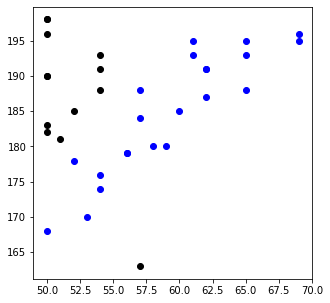

In [15]:
# 각 비만도 등급별로 시각화 (분류가 가능한지 확인)


plt.figure(figsize=(5,5))

t = data.loc['Extremely Weak']
plt.scatter(t['Weight'], t['Height'], c='black', label='Extremely Weak' )

t = data.loc['Weak']
plt.scatter(t['Weight'], t['Height'], c='blue', label='Weak' )

plt.show()

In [19]:
def a(label, color):
    t = data.loc['label']
    plt.scatter(t['Weight'], t['Height'], c='color', label='label' )

plt.figure(figsize=(5,5))

a('Extremely Weak', 'black')

#t = data.loc['Extremely Weak']
#plt.scatter(t['Weight'], t['Height'], c='black', label='Extremely Weak' )

t = data.loc['Weak']
plt.scatter(t['Weight'], t['Height'], c='blue', label='Weak' )

plt.show()

KeyError: 'label'

모델링

1. 문제와 답으로 분리

2. 훈련셋과 평가셋으로 분리

3. 모델생성 및 하이퍼파라미터 조정

4. 학습 및 평가

In [34]:
# 비만도 모델 학습
data = pd.read_csv(r'C:\Users\dlxot\Desktop\박준영_시각화\bmi_500.csv')
X = data.loc[:, 'Height':'Weight']
y = data.loc[:, 'Label']

print(X.shape)
print(y.shape)

X_train = X.iloc[:350, :]
X_test = X.iloc[350:, :]
y_train = X.iloc[:350]
y_test = X.iloc[350:]

model = KNeighborsClassifier(n_neighbors=9)
model.fit(X_train, y_train)
pre = model.predict(X_test)
metrics.accuracy_score(pre, y_test)

(500, 2)
(500,)


ValueError: multiclass-multioutput is not supported

In [ ]:
# 예측 활용
bmi_model.predict([[100,20],[185,43]])

### 머신러닝(Machine Learning) 진행 과정

1. ProblemIdentification (문제정의)
2. Data Collect(데이터 수집)
3. Data Preprocessing(데이터 전처리)
4. EDA(탐색적 데이터분석)
5. Model 선택, Hyper Parameter 조정
6. 학습
7. 모델 Evaluation(평가)
